In [ ]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pylab as plt
import seaborn as sns

# 1. Descriptive Statistics

## 1.1 Load Datasets

In [ ]:
train_transaction = pd.read_csv('input/train_transaction.csv')
train_identity = pd.read_csv('input/train_identity.csv')

test_transaction = pd.read_csv('input/test_transaction.csv')
test_identity = pd.read_csv('input/test_identity.csv')

Reduce memory since the datasets would take a lot

In [3]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
## Reducing memory of train sets
train_transaction = reduce_mem_usage(train_transaction)
train_identity = reduce_mem_usage(train_identity)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.72 Mb (43.0% reduction)


In [5]:
## Reducing memory of test sets
test_transaction = reduce_mem_usage(test_transaction)
test_identity = reduce_mem_usage(test_identity)

Mem. usage decreased to 472.59 Mb (68.9% reduction)
Mem. usage decreased to 25.44 Mb (42.7% reduction)


## 1.2 Preparing Data

merge *train_transaction* and *train_identity*, *test_transaction* and *test_identity*

In [ ]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

data descripiton of *train* and *test*

In [37]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


output the new csv files

In [ ]:
train.to_csv('data/train.csv')
test.to_csv('data/test.csv')

In [9]:
del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

0

## 1.3 View Datasets

- load datasets

In [ ]:
# If you have run 1.1 and 1.2, you don't need to run this cell
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

- train

In [39]:
pd.set_option('display.max_columns', None)
pd.DataFrame(train)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0

- test

In [ ]:
pd.DataFrame(test)

## 1.4 Shape of Datasets

In [11]:
print('train shape is {}'.format(train.shape))
print('test shape is {}'.format(test.shape))

train shape is (590540, 435)
test shape is (506691, 434)


## 1.5 Features Overview
### 1.5.1 types of features

In [12]:
# pd.set_option('display.max_rows', None)
sm = pd.DataFrame(train).dtypes

In [13]:
pd.set_option("display.precision", 1)
pd.DataFrame(train.describe())

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,590540.0,5.9e+05,5.9e+05,5.9e+05,590540.0,590540.0,581607.0,588975.0,586281.0,524834.0,524834.0,238269.0,37627.0,590540.0,590540.0,5.9e+05,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,589271.0,309743.0,327662.0,421618.0,280699.0,73187.0,38917.0,74926.0,74926.0,514518.0,311253.0,64717.0,61952.0,62187.0,501427.0,3.1e+05,311253.0,311253.0,311253.0,311253.0,311253.0,311253.0,311253.0,311253.0,311253.0,311253.0,514467.0,514467.0,5.1e+05,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,5.1e+05,5.1e+05,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,4.2e+05,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,5.1e+05,513444.0,513444.0,5.1e+05,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,5.0e+05,5.0e+05,501376.0,501376.0,501376.0,501376.0,501376.0,590226.0,590226.0,590226.0,5.9e+05,590226.0,590226.0,590226.0,590226.0,590226.0,5.9e+05,590226.0,590226.0,5.9e+05,5.9e+05,590226.0,5.9e+05,5.9e+05,5.9e+05,5.9e+05,590226.0,590226.0,590226.0,5.9e+05,5.9e+05,5.9e+05,5.9e+05,5.9e+05,5.9e+05,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,8.2e+04,81945.0,81945.0,8.2e+04,8.2e+04,81951.0,81951.0,81951.0,81945.0,81945.0,81945.0,81945.0,81951.0,81951.0,81951.0,81945.0,81945.0,81945.0,81945.0,81945.0,81945.0,81951.0,81951.0,81945.0,81945.0,81945.0,81951.0,81951.0,81951.0,139631.0,139631.0,139819.0,139819.0,139819.0,139631.0,1.4e+05,139819.0,139819.0,139631.0,139631.0,139631.0,139631.0,139819.0,139631.0,139631.0,139631.0,139819.0,139819.0,139631.0,139631.0,139819.0,139819.0,139631.0,139631.0,139631.0,139631.0,139819.0,1

### 1.5.2 Statistical Description and Boxplots
#### 1.5.2.1 TransactionDT

In [14]:
print('type of TransactionDT is ' + str(train["TransactionDT"].dtypes))

type of TransactionDT is int64


> The *TransactionDT* feature is a timedelta from a given reference datetime (not an actual timestamp).

In [15]:
sm = pd.DataFrame(
    [
        ['count',train['TransactionDT'].count(), test['TransactionDT'].count()],
        ['min',train.TransactionDT.min(), test.TransactionDT.min()],
        ['max',train.TransactionDT.max(), test.TransactionDT.max()],
        ['range',train.TransactionDT.max() - train.TransactionDT.min(), test.TransactionDT.max() - test.TransactionDT.min()],
        ['mid-range',(train.TransactionDT.max() - train.TransactionDT.min())/2, (test.TransactionDT.max() - test.TransactionDT.min())/2],
        ['mean',train.TransactionDT.mean(), test.TransactionDT.mean()],
        ['median',train.TransactionDT.median(), test.TransactionDT.median()],
        ['std.dev',train.TransactionDT.std(), test.TransactionDT.std()],
        ['variance',train.TransactionDT.var(), test.TransactionDT.var()],
        ['mode',train.TransactionDT.mode(), test.TransactionDT.mode()],
        ['25%',train.TransactionDT.quantile(0.25), test.TransactionDT.quantile(0.25)],
        ['50%',train.TransactionDT.quantile(0.50), test.TransactionDT.quantile(0.50)],
        ['75%',train.TransactionDT.quantile(0.75), test.TransactionDT.quantile(0.75)],
        ['IQR',train.TransactionDT.quantile(0.75)-train.TransactionDT.quantile(0.25), test.TransactionDT.quantile(0.75)-test.TransactionDT.quantile(0.25)]
    ],
    columns=['property','value_of_train','value_of_test']
)
# sm['value_of_train'] = sm.value_of_train.astype(int)
# sm['value_of_test'] = sm.value_of_test.astype(int)
sm

,property,value_of_train,value_of_test
0,count,590540,506691
1,min,86400,18403224
2,max,15811131,34214345
3,range,15724731,15811121
4,mid-range,7862365.5,7905560.5
5,mean,7372311.3,26929937.2
6,median,7306527.5,27204658.0
7,std.dev,4617223.6,4756506.7
8,variance,21318754202165.2,22624356079919.6
9,mode,"0 9474817 Name: TransactionDT, dtype: int64",0 19601418 1 26576684 2 31790084 3 ...


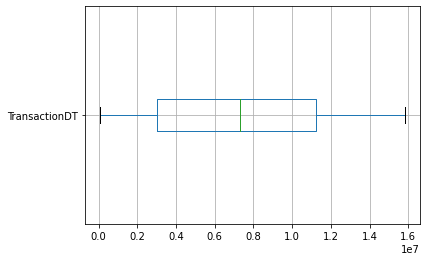

In [16]:
train[['TransactionDT']].boxplot(vert = False)
plt.show()

In [17]:
print("train: min = " + str(train.TransactionDT.min()) + ", train: max = " + str(train.TransactionDT.max()))
print("test: min = " + str(test.TransactionDT.min()) + ", test: max = " + str(test.TransactionDT.max()))

train: min = 86400, train: max = 15811131
test: min = 18403224, test: max = 34214345


In [18]:
time_span = (test.TransactionDT.max() - train.TransactionDT.min()) / 60 / 60 / 24
print("time span of the total datasets is: " + str(round(time_span)) + 'days')

time span of the total datasets is: 395days


#### 1.5.2.2 ProductCD

In [19]:
print('type of ProductCD is ' + str(train["ProductCD"].dtypes))

type of ProductCD is object


> Products in this dataset come under five broad categories: W, H, C, S, and R.

We will visualize this feature in relation with the target, *isFraud*.

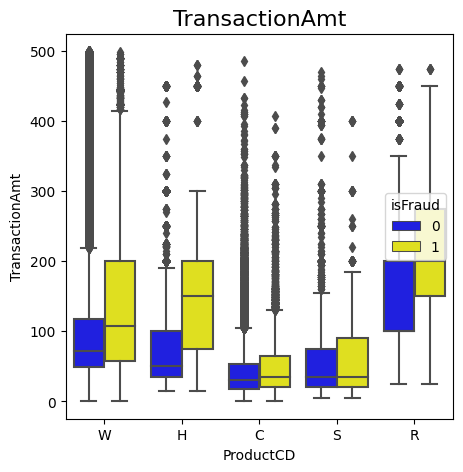

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="ProductCD", y="TransactionAmt", hue = "isFraud", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

Except for *C* and *S*, the non-fraudulent mean, first quartile, and third quartile of the products are higher than the fraudulent ones.

#### 1.5.2.3 TransactionAmt

In [21]:
print('type of TransactionAmt is ' + str(train["TransactionAmt"].dtypes))

type of TransactionAmt is float64


This is the amount of money transferred during the transaction, which is a continuous variable. We will visualize this feature in relation with the target - *isFraud*.

In [22]:
sm = pd.DataFrame(
    [
        ['count',train['TransactionAmt'].count()],
        ['min',train.TransactionAmt.min()],
        ['max',train.TransactionAmt.max()],
        ['range',train.TransactionAmt.max() - train.TransactionDT.min()],
        ['mid-range',(train.TransactionAmt.max() - train.TransactionAmt.min())/2],
        ['mean',train.TransactionAmt.mean()],
        ['median',train.TransactionAmt.median()],
        ['std.dev',train.TransactionAmt.std()],
        ['variance',train.TransactionAmt.var()],
        ['mode',train.TransactionAmt.mode()],
        ['25%',train.TransactionAmt.quantile(0.25)],
        ['50%',train.TransactionAmt.quantile(0.50)],
        ['75%',train.TransactionAmt.quantile(0.75)],
        ['IQR',train.TransactionAmt.quantile(0.75)-train.TransactionAmt.quantile(0.25)]
    ],
    columns=['property','value']
)
sm

,property,value
0,count,590540
1,min,0.3
2,max,31940.0
3,range,-54460.0
4,mid-range,15969.9
5,mean,135.0
6,median,68.8
7,std.dev,239.2
8,variance,57196.9
9,mode,"0 59.0 Name: TransactionAmt, dtype: float64"


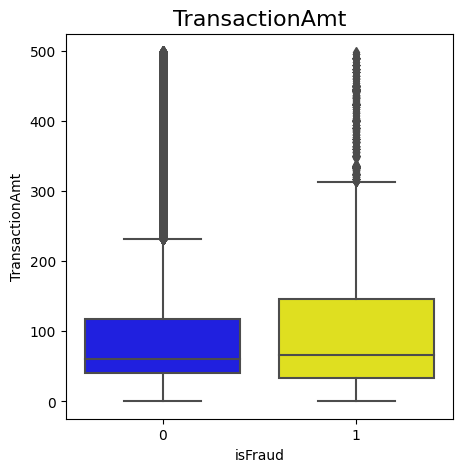

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="isFraud", y="TransactionAmt", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

The above box plot implies that transactions with higher prices are more likely to be fraudulent. This can be deduced from the fact that the yellow box's mean value is higher than the blue box's. The third quartile of the yellow box is significantly higher than that of the blue box, despite the first quartiles of the two distributions being very similar. This difference serves as additional proof that the higher the transaction amount, the more likely the transaction to be fraudulent.

#### 1.5.2.4 card brand (card4)

In [24]:
print('type of card4 is ' + str(train["card4"].dtypes))

type of card4 is object


The *card4* refers to the brand of the card, which are discover, mastercard, visa, and american express.

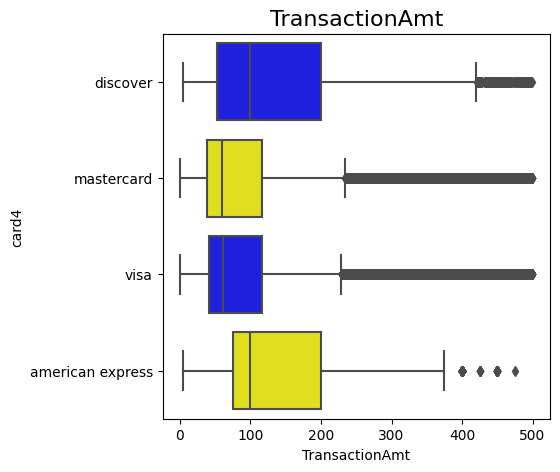

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="TransactionAmt", y="card4", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

The distributions for fraudulent and legitimate Mastercard and Visa cards are remarkably similar. Furthermore, it is evident from this box plot that Discover and American Express cards are frequently used for larger transaction amounts. They have far higher means than the other two card brands.

#### 1.5.2.5 Card type (card6)

In [26]:
print('type of card6 is ' + str(train["card6"].dtypes))

type of card6 is object


The *card6* refers to the btype of the card, which are credit and debit.

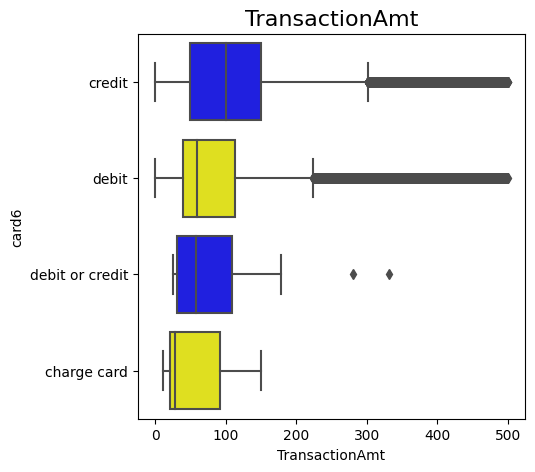

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="TransactionAmt", y="card6", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

It can be seen from the boxplot above, the average transaction value of credit cards is much higher compared to debit cards.

# 2. Skewness

## 2.1 TransactionDT

skewness
TransactionDT    0.1
dtype: float64


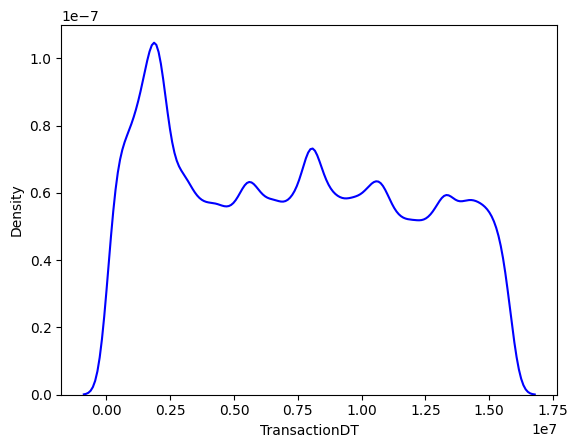

In [35]:
sns.kdeplot(train['TransactionDT'], color = 'b')
print('skewness')
print(train[['TransactionDT']].skew())

## 2.2 TransactionAmt

skewness
TransactionAmt    14.4
dtype: float64


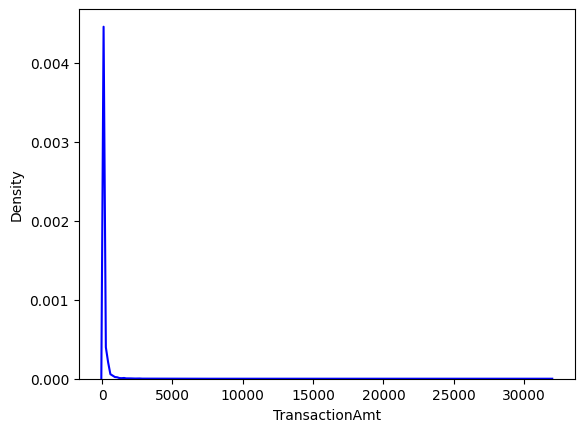

In [36]:
sns.kdeplot(train['TransactionAmt'], color = 'b')
print('skewness')
print(train[['TransactionAmt']].skew())

## 2.3 Card1

skewness
card1   -4.1e-02
dtype: float64


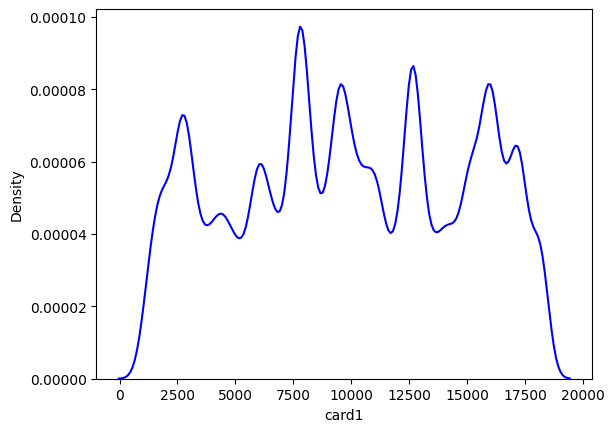

In [37]:
sns.kdeplot(train['card1'], color = 'b')
print('skewness')
print(train[['card1']].skew())

## 2.4 Card2

skewness
card2   -0.2
dtype: float64


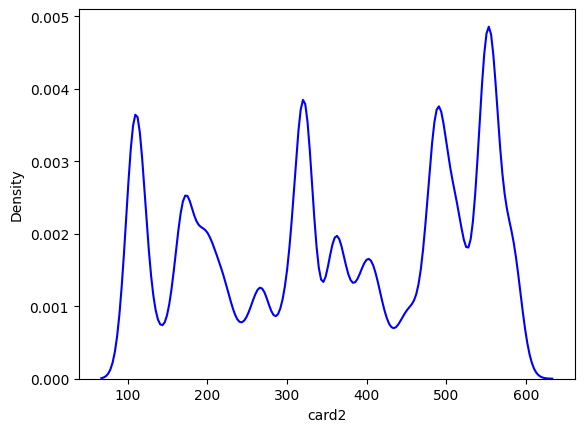

In [38]:
sns.kdeplot(train['card2'], color = 'b')
print('skewness')
print(train[['card2']].skew())

## 2.5 Card3

skewness
card3    2.0
dtype: float64


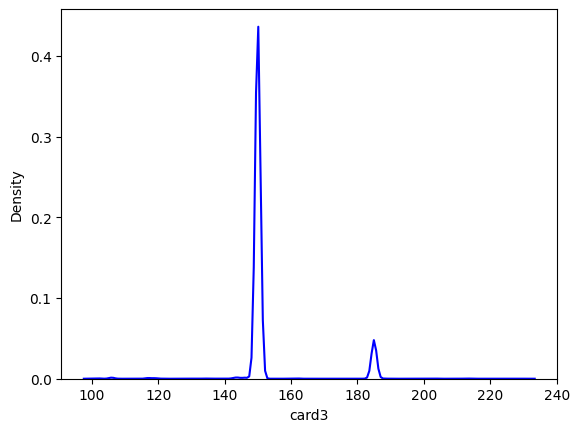

In [39]:
sns.kdeplot(train['card3'], color = 'b')
print('skewness')
print(train[['card3']].skew())

## 2.6 Card5

skewness
card5   -1.2
dtype: float64


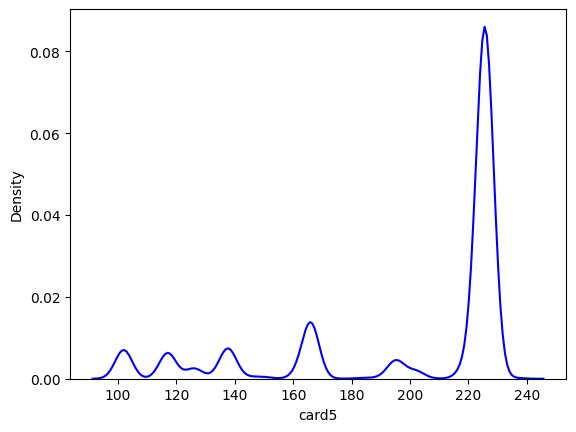

In [40]:
sns.kdeplot(train['card5'], color = 'b')
print('skewness')
print(train[['card5']].skew())

# 4. Correlations between features
## 4.1 Correlation Coffeicents
      The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables

In [75]:
#finding coeffeicients between few numeric data columns
numeric_data = pd.DataFrame(train, columns = ['TransactionDT', 'TransactionAmt','dist1', 'V33', 'V12', 'C11', 'C5','C2','V51', 'D4','D3', 'D15'])
numeric_data.corr(method = 'pearson')


,TransactionDT,TransactionAmt,dist1,V33,V12,C11,C5,C2,V51,D4,D3,D15
TransactionDT,1.000000,0.011920,-0.027295,-0.013207,0.095749,-0.050181,0.023800,-0.051126,-0.035868,0.059797,-0.007200,0.072791
TransactionAmt,0.011920,1.000000,0.026146,-0.135732,0.083627,-0.017313,-0.030560,-0.018468,-0.149459,-0.050347,-0.002166,-0.054735
dist1,-0.027295,0.026146,1.000000,0.005313,0.029441,-0.021470,-0.020064,-0.020114,-0.004182,-0.037729,0.001520,-0.045665
V33,-0.013207,-0.135732,0.005313,1.000000,-0.369410,-0.024444,-0.088878,0.027042,0.940497,-0.197543,0.007453,-0.251661
V12,0.095749,0.083627,0.029441,-0.369410,1.000000,-0.009336,0.017205,-0.027223,-0.417592,-0.086478,-0.056569,-0.094844
C11,-0.050181,-0.017313,-0.021470,-0.024444,-0.009336,1.000000,0.168862,0.993898,0.095588,0.005410,0.000251,0.002290
C5,0.023800,-0.030560,-0.020064,-0.088878,0.017205,0.168862,1.000000,0.126540,-0.095805,0.145618,-0.017262,0.151755
C2,-0.051126,-0.018468,-0.020114,0.027042,-0.027223,0.993898,0.126540,1.000000,0.110860,-0.001038,0.000743,-0.004773
V51,-0.035868,-0.149459,-0.004182,0.940497,-0.417592,0.095588,-0.095805,0.110860,1.000000,-0.197530,0.001905,-0.259066
D4,0.059797,-0.050347,-0.037729,-0.197543,-0.086478,0.005410,0.145618,-0.001038,-0.197530,1.000000,0.149038,0.751546


<AxesSubplot:>

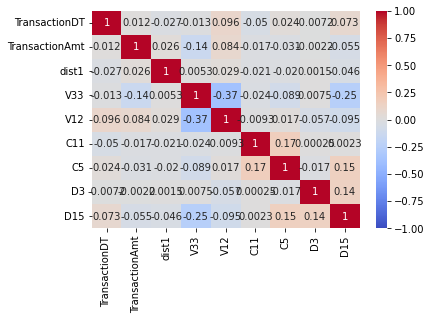

In [64]:
#A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot = True )

<AxesSubplot:xlabel='TransactionAmt', ylabel='V33'>

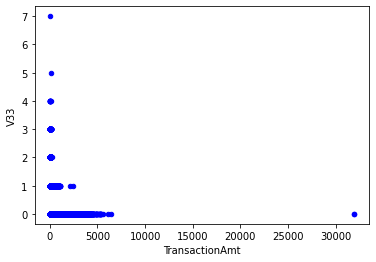

In [65]:
#pandas scatter plot between two variables
numeric_data.plot(x='TransactionAmt',y='V33',kind='scatter',color = 'Blue')


<AxesSubplot:xlabel='D3', ylabel='C11'>

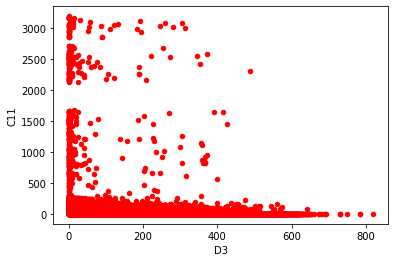

In [66]:
#pandas scatter plot between two variables
numeric_data.plot(x='D3',y='C11',kind='scatter',color = 'Red')


<AxesSubplot:xlabel='D3', ylabel='C11'>

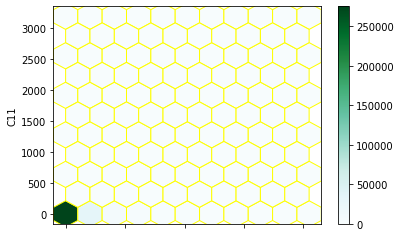

In [69]:
#pandas hexbin plot between two variables

numeric_data.plot(x='D3',y='C11',kind='hexbin',color = 'Yellow', gridsize =10)


<AxesSubplot:xlabel='TransactionAmt', ylabel='V33'>

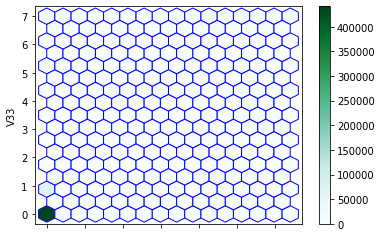

In [70]:
#pandas hexbin plot between two variables

numeric_data.plot(x='TransactionAmt',y='V33',kind='hexbin',color = 'Blue', gridsize=15)


## 4.2 Chi-square test
The chi-square test is to test if two categorical features are independent, or not. The null hypothesis ($H_0$) is that two observed features are independent. The alternative hypothesis ($H_a$) is that the two observed features are dependent.

In [3]:
# the significant value that will be used is 0.05
sig_value = 0.05

### 4.2.1 ProductCD and Card4
$H_0$: ProductCD and Card4 are independent $\newline$
$H_a$: ProductCD and Card4 are dependent

In [4]:
pd.DataFrame(train, columns = ['ProductCD', 'card4'])

,ProductCD,card4
0,W,discover
1,W,mastercard
2,W,visa
3,W,mastercard
4,H,mastercard
...,...,...
590535,W,visa
590536,W,mastercard
590537,W,mastercard
590538,W,mastercard


In [5]:
table = pd.crosstab(train['ProductCD'], train['card4'])
table

card4,american express,discover,mastercard,visa
ProductCD,,,,
C,2,0,27418,40904
H,1566,603,7938,22907
R,6138,1089,7432,23039
S,622,580,4042,6384
W,0,4379,142387,291533


In [6]:
observed_values = table.values
observed_values

array([[     2,      0,  27418,  40904],
       [  1566,    603,   7938,  22907],
       [  6138,   1089,   7432,  23039],
       [   622,    580,   4042,   6384],
       [     0,   4379, 142387, 291533]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [7]:
import scipy.stats as sp
from scipy.stats import chi2_contingency

#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
#print('p-value =', p)
print('degrees of freedom =', dof)
#print('expected frequencies =', expected_freq)

chi2 test stat = 78171.3003
degrees of freedom = 12


In [8]:
from scipy.stats import chi2

crit_value = chi2.ppf(1 - sig_value, dof)

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("ProductCD and card4 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("ProductCD and card4 are independent features")

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
ProductCD and card4 are dependent features


 ### 4.2.2 ProductCD and Card5
$H_0$: ProductCD and Card5independent $\newline$
$H_a$: ProductCD and Card5 are dependent

In [9]:
pd.DataFrame(train, columns = ['ProductCD', 'card5'])

,ProductCD,card5
0,W,142.0
1,W,102.0
2,W,166.0
3,W,117.0
4,H,102.0
...,...,...
590535,W,226.0
590536,W,224.0
590537,W,224.0
590538,W,224.0


In [10]:
table = pd.crosstab(train['ProductCD'], train['card5'])
table

card5,100.0,101.0,102.0,104.0,105.0,106.0,107.0,109.0,111.0,112.0,...,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0
ProductCD,,,,,,,,,,,,,,,,,,,,,
C,4,7,3175,0,0,0,1,0,4,3,...,62,0,4,0,61,15,0,0,0,0
H,149,0,2577,4,1,0,0,0,13,0,...,21,33,0,0,4,0,1,0,175,7
R,40,0,2654,17,0,2,0,0,0,0,...,125,5,0,0,0,0,0,0,434,39
S,11,0,2111,2,1,3,0,0,0,0,...,27,20,0,0,0,0,0,0,38,3
W,774,0,18588,0,0,0,11,3,8,0,...,13,1990,0,2,4,4,0,6,0,0


In [11]:
observed_values = table.values

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [12]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
#print('p-value =', p)
print('degrees of freedom =', dof)
#print('expected frequencies =', expected_freq)

chi2 test stat = 364652.2048
degrees of freedom = 472


In [13]:
crit_value = chi2.ppf(1 - sig_value, dof)

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("ProductCD and card5 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("ProductCD and card5 are independent features")

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
ProductCD and card5 are dependent features


### 4.2.3 ProductCD and Card6
$H_0$: ProductCD and Card6 are independent $\newline$
$H_a$: ProductCD and Card6 are dependent

In [14]:
pd.DataFrame(train, columns = ['ProductCD', 'card6'])

,ProductCD,card6
0,W,credit
1,W,credit
2,W,debit
3,W,debit
4,H,credit
...,...,...
590535,W,debit
590536,W,debit
590537,W,debit
590538,W,debit


In [15]:
table = pd.crosstab(train['ProductCD'], train['card6'])
table

card6,charge card,credit,debit,debit or credit
ProductCD,,,,
C,12,27551,40763,0
H,0,17656,15367,0
R,3,26499,11192,0
S,0,6527,5100,0
W,0,70753,367516,30


In [16]:
observed_values = table.values
observed_values

array([[    12,  27551,  40763,      0],
       [     0,  17656,  15367,      0],
       [     3,  26499,  11192,      0],
       [     0,   6527,   5100,      0],
       [     0,  70753, 367516,     30]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [17]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
#print('p-value =', p)
print('degrees of freedom =', dof)
#print('expected frequencies =', expected_freq)

chi2 test stat = 87807.5884
degrees of freedom = 12


In [18]:
crit_value = chi2.ppf(1 - sig_value, dof)

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("ProductCD and card6 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("ProductCD and card6 are independent features")

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
ProductCD and card6 are dependent features


### 4.2.4 Card4 and Card5
$H_0$: Card4 and Card5 are independent $\newline$
$H_a$: Card4 and Card5 are dependent

In [19]:
pd.DataFrame(train, columns = ['card4', 'card5'])

,card4,card5
0,discover,142.0
1,mastercard,102.0
2,visa,166.0
3,mastercard,117.0
4,mastercard,102.0
...,...,...
590535,visa,226.0
590536,mastercard,224.0
590537,mastercard,224.0
590538,mastercard,224.0


In [20]:
table = pd.crosstab(train['card4'], train['card6'])
table

card6,charge card,credit,debit,debit or credit
card4,,,,
american express,3,8175,144,0
discover,0,6304,347,0
mastercard,0,50772,138415,30
visa,12,83732,301023,0


In [21]:
observed_values = table.values
observed_values

array([[     3,   8175,    144,      0],
       [     0,   6304,    347,      0],
       [     0,  50772, 138415,     30],
       [    12,  83732, 301023,      0]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [22]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
#print('p-value =', p)
print('degrees of freedom =', dof)
#print('expected frequencies =', expected_freq)

chi2 test stat = 43314.2477
degrees of freedom = 9


In [23]:
crit_value = chi2.ppf(1 - sig_value, dof)

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("Card4 and card5 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("Card4 and card5 are independent features")

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
Card4 and card5 are dependent features


### 4.2.5 Card4 and Card6
$H_0$: Card4 and Card6 are independent $\newline$
$H_a$: Card4 and Card6 are dependent

In [24]:
pd.DataFrame(train, columns = ['card4', 'card6'])

,card4,card6
0,discover,credit
1,mastercard,credit
2,visa,debit
3,mastercard,debit
4,mastercard,credit
...,...,...
590535,visa,debit
590536,mastercard,debit
590537,mastercard,debit
590538,mastercard,debit


In [25]:
table = pd.crosstab(train['card4'], train['card6'])
table

card6,charge card,credit,debit,debit or credit
card4,,,,
american express,3,8175,144,0
discover,0,6304,347,0
mastercard,0,50772,138415,30
visa,12,83732,301023,0


In [26]:
observed_values = table.values
observed_values

array([[     3,   8175,    144,      0],
       [     0,   6304,    347,      0],
       [     0,  50772, 138415,     30],
       [    12,  83732, 301023,      0]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [27]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
#print('p-value =', p)
print('degrees of freedom =', dof)
#print('expected frequencies =', expected_freq)

chi2 test stat = 43314.2477
degrees of freedom = 9


In [28]:
crit_value = chi2.ppf(1 - sig_value, dof)

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("Card4 and card6 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("Card4 and card6 are independent features")

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
Card4 and card6 are dependent features


### 4.2.6 Card5 and Card6
$H_0$: Card5 and Card6 are independent $\newline$
$H_a$: Card5 and Card6 are dependent

In [29]:
pd.DataFrame(train, columns = ['card5', 'card6'])

,card5,card6
0,142.0,credit
1,102.0,credit
2,166.0,debit
3,117.0,debit
4,102.0,credit
...,...,...
590535,226.0,debit
590536,224.0,debit
590537,224.0,debit
590538,224.0,debit


In [30]:
table = pd.crosstab(train['card5'], train['card6'])
table

card6,charge card,credit,debit,debit or credit
card5,,,,
100.0,0,0,978,0
101.0,0,0,7,0
102.0,0,28611,494,0
104.0,0,23,0,0
105.0,0,2,0,0
...,...,...,...,...
233.0,0,0,19,0
234.0,0,0,1,0
235.0,0,6,0,0


In [31]:
observed_values = table.values

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [32]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
#print('p-value =', p)
print('degrees of freedom =', dof)
#print('expected frequencies =', expected_freq)

chi2 test stat = 236793.9479
degrees of freedom = 354


In [33]:
crit_value = chi2.ppf(1 - sig_value, dof)

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("Card5 and card6 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("Card5 and card6 are independent features")

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
Card5 and card6 are dependent features
